In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('C:/Users/shrid/Downloads/AST/train_without_noise.csv')
df.shape

(28895, 292)

In [13]:
# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values


In [15]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in df.columns:
 pct_missing = np.mean(df[col].isnull())*100
 cols_list.append(col)
 values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

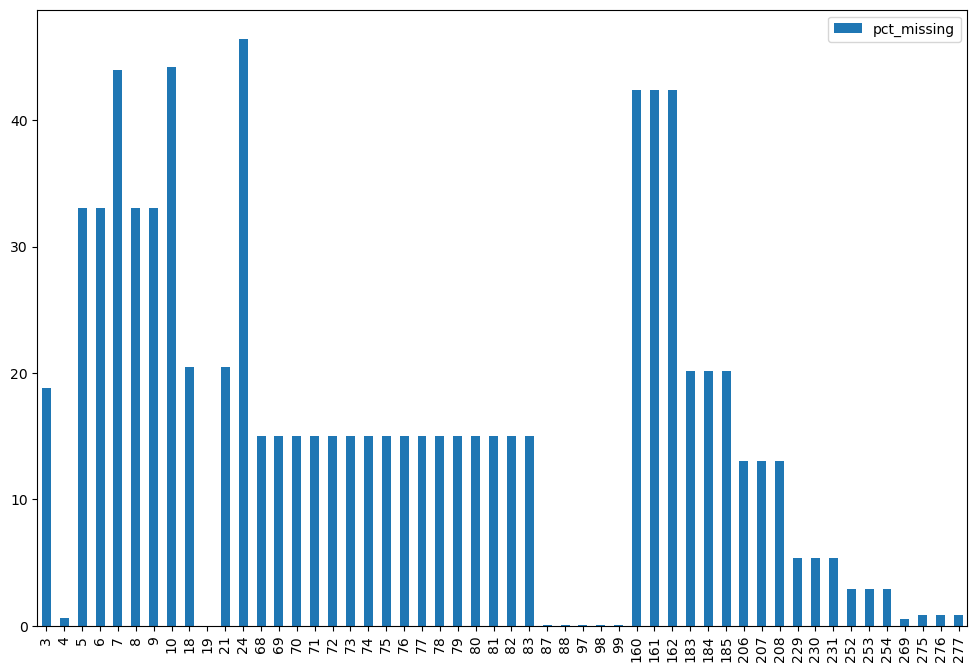

In [16]:
pct_missing_df.loc[pct_missing_df.pct_missing > 0].plot(kind='bar', figsize=(12,8))
plt.show()

In [17]:
less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing <
0.5) & (pct_missing_df.pct_missing > 0), 'col'].values)
df.dropna(subset=less_missing_values_cols_list, inplace=True)


In [18]:
# dropping columns with more than 40% null values
_40_pct_missing_cols_list = list(pct_missing_df.loc[pct_missing_df.pct_missing > 40,
'col'].values)
df.drop(columns=_40_pct_missing_cols_list, inplace=True)

In [20]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
 missing = df[col].isnull()
 num_missing = np.sum(missing)
 if num_missing > 0: # impute values only for columns that have missing values
  med = df[col].median() #impute with the median
  df[col] = df[col].fillna(med)


In [21]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
 missing = df[col].isnull()
 num_missing = np.sum(missing)
 if num_missing > 0: # impute values only for columns that have missing values
  mod = df[col].describe()['top'] # impute with the most frequently occuring value
  df[col] = df[col].fillna(mod)


In [22]:
df.isnull().sum().sum()

0

In [23]:
df.life_sq.describe()


count    28870.000000
mean        33.365431
std         47.040912
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

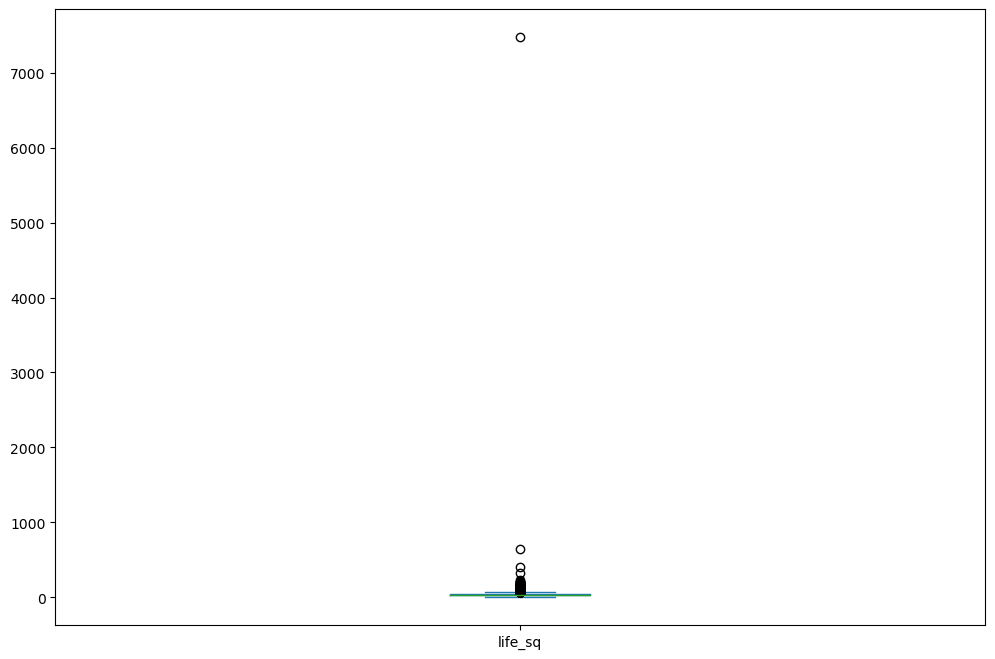

In [24]:
df.life_sq.plot(kind='box', figsize=(12, 8))
plt.show()

In [25]:
# removing the outlier value in life_sq column
df = df.loc[df.life_sq < 7478]


In [26]:
# dropping duplicates by considering all columns other than ID
cols_other_than_id = list(df.columns)[1:]
df.drop_duplicates(subset=cols_other_than_id, inplace=True)


In [27]:
df.timestamp.dtype

dtype('O')

In [28]:
# converting timestamp to datetime format
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d')